In [2]:
# import sys;
# !conda install --yes --prefix {sys.prefix} plotly
# !conda install --yes --prefix {sys.prefix} pandas
# !conda install --yes --prefix {sys.prefix} numpy
# !conda install --yes --prefix {sys.prefix} openpyxl

# import pandas as pd
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# from pathlib import Path
# import numpy as np

# print("Packages installed and imported")

In [198]:
# Importing Data
file_path = '/Users/aconway/Desktop/Occupational_data.xlsx'
sheet_name = 'TEST'
column_names = ['skills', 'postings', 'postings_prop', 'profiles', 'profiles_prop', 'skillgrowth_proj', 'skillgrowth_market', 'skillgrowth_market_num', 'type']
column_names2 = ['skills', 'postings', 'skillgrowth_proj', 'skillgrowth_market', 'skillgrowth_market_num', 'type']

skills5yr_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='AV:AY', nrows=40, names=['skills', 'propchange_18_23', 'prop_23', 'type'])
skills5yr_ncsa['propchange_18_23'] *= 100
skills5yr_ncsa['prop_23'] *= 100
skills5yr_ncsa = skills5yr_ncsa.copy().round(2)

specialised_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='A:I', nrows=50, names=column_names)
common_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='J:R', nrows=50, names=column_names)
software_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='S:AA', nrows=50, names=column_names)

distinguishing_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='AB:AG', nrows=10, names=column_names2)
defining_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='AH:AM', nrows=10, names=column_names2)
necessary_ncsa = pd.read_excel(file_path, sheet_name=sheet_name, usecols='AN:AS', nrows=10, names=column_names2)

# Convert decimals to percentages
specialised_ncsa['postings_prop'] *= 100
specialised_ncsa['profiles_prop'] *= 100
specialised_ncsa['skillgrowth_proj'] *= 100
common_ncsa['postings_prop'] *= 100
common_ncsa['profiles_prop'] *= 100
common_ncsa['skillgrowth_proj'] *= 100
software_ncsa['postings_prop'] *= 100
software_ncsa['profiles_prop'] *= 100
software_ncsa['skillgrowth_proj'] *= 100
distinguishing_ncsa['skillgrowth_proj'] *= 100
defining_ncsa['skillgrowth_proj'] *= 100
necessary_ncsa['skillgrowth_proj'] *= 100

#Save datasets into CSV for Pycharm
# skills5yr_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/skills5yr_ncsa.csv', index=False)
# specialised_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/specialised_ncsa.csv', index=False)
# software_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/software_ncsa.csv', index=False)
# common_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/common_ncsa.csv', index=False)
# distinguishing_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/distinguishing_ncsa.csv', index=False)
# defining_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/defining_ncsa.csv', index=False)
# necessary_ncsa.to_csv('/Users/aconway/Dropbox/Occupational_transformation/necessary_ncsa.csv', index=False)

# Occupational Profiles
The goal of this stage is to create comprehensive profiles for different occupations based on the skills demanded in job postings.

##### *HOW*:
**Occupational Profiling**: Identify the top skills required for each occupation and create skill profiles highlighting key competencies by categorizing skills into groups (e.g., fundamental, specialized, technical, human) and rank them based on frequency in job postings for each occupation.

##### *QUESTIONS ANSWERED*:
* What are the key skills required for different occupations?
* Which skills and type are most in demand for specific occupations?
* Which are in-demand and expected to grow, which are not?

This last question will give us a sense of how the most important skills for each type defining a job is faring. If the most relevant skills (by demand) are also growing highly in the economy, this  

##### Visualizations: 
Goal is to show first sense of 
Make a dashboard for ease of use
- To show general make-up: Donut charts with proportion of type (human, technical, etc) for each skill bucket
- Heatmaps for Skill Importance 
- To show how each bucket fares and if certain: % lagging, % stable, % growing, % rapidly growing for each skill bucket
- 

In [124]:
skills5yr_ncsa.head()

,skills,propchange_18_23,prop_23,type
0,Cloud Solutions,6.58,17.56,technical
1,Initiative and Leadership,5.98,39.77,human
2,Cybersecurity,4.93,26.74,technical
3,Communication,4.73,47.55,human
4,Personal Attributes,4.43,29.57,human


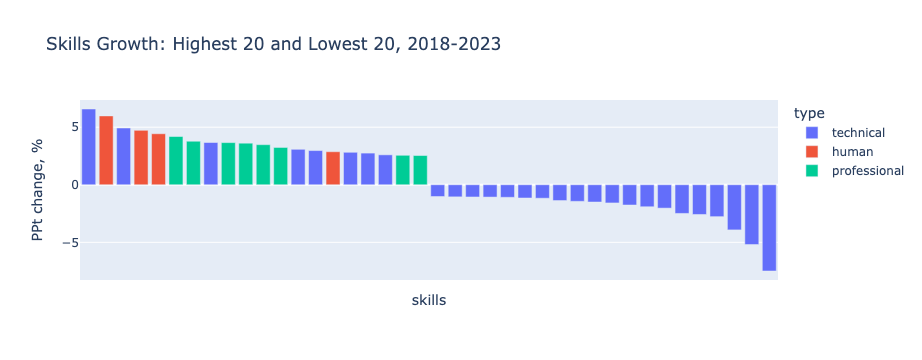

In [191]:
### General Skills Trends

# Manually order the x-axis categories based on the percentage change
ordered_x = skills5yr_ncsa.groupby('skills')['propchange_18_23'].max().sort_values(ascending=False).index

fig = px.bar(skills5yr_ncsa, x = 'skills', y='propchange_18_23', color = 'type', category_orders={'skills': ordered_x},
            hover_data={'type': False},
            title = 'Skills Growth: Highest 20 and Lowest 20, 2018-2023')

# Update layout to hide x-axis labels and customize hover information
fig.update_layout(
    xaxis=dict(showticklabels=False),  # Hide x-axis labels
)
# Update layout to set y-axis label
fig.update_yaxes(title_text='PPt change, %')

fig.show()

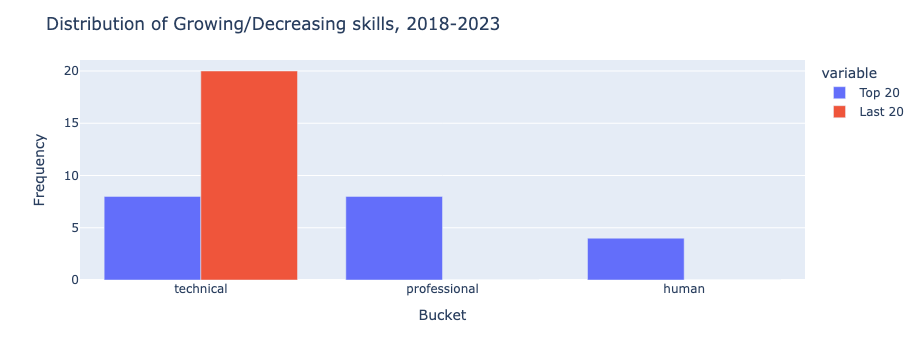

In [185]:
worst_20 = skills5yr_ncsa.tail(20)
worst_20_counts = worst_20['type'].value_counts()

top_20 = skills5yr_ncsa.head(20)
top_20_counts = top_20['type'].value_counts()

counts_combined = pd.concat([top_20_counts, worst_20_counts], axis=1, keys=['Top 20', 'Last 20'])

# Fill NaN values with 0 if a category is not present in one of the subsets
counts_combined = counts_combined.fillna(0)


# Create a bar chart for counts
fig = px.bar(counts_combined, x=counts_combined.index, y=['Top 20', 'Last 20'], barmode='group')

# Update layout to set axis labels and title
fig.update_layout(xaxis_title='Bucket', yaxis_title='Frequency', title='Distribution of Growing/Decreasing skills, 2018-2023')
fig.show()

In [67]:
specialised_ncsa['skilltype'] = 'Specialised Skills'
common_ncsa['skilltype'] = 'Common Skills'
software_ncsa['skilltype'] = 'Software Skills'

distinguishing_ncsa['skilltype'] = 'Distinguishing Skills'
defining_ncsa['skilltype'] = 'Defining Skills'
necessary_ncsa['skilltype'] = 'Necessary Skills'

# Select specific columns from each DataFrame
common_ncsa_subset = common_ncsa[['skills', 'skilltype']]
specialised_ncsa_subset = specialised_ncsa[['skills', 'skilltype']]
software_ncsa_subset = software_ncsa[['skills', 'skilltype']]
distinguishing_ncsa_subset = distinguishing_ncsa[['skills', 'skilltype']]
defining_ncsa_subset = defining_ncsa[['skills', 'skilltype']]
necessary_ncsa_subset = necessary_ncsa[['skills', 'skilltype']]


# Concatenate the selected columns
occupationskills_ncsa = pd.concat([common_ncsa_subset, specialised_ncsa_subset, software_ncsa_subset, distinguishing_ncsa_subset, defining_ncsa_subset, necessary_ncsa_subset], ignore_index=True)

occupationskills_ncsa.head()


skilltype_list = set(common_ncsa['skilltype'].tolist() + specialised_ncsa['skilltype'].tolist() + software_ncsa['skilltype'].tolist())
occupationskills_ncsa['bucket'] = occupationskills_ncsa['skilltype'].apply(lambda x: 'General Skills' if x in skilltype_list else 'Key Skills')

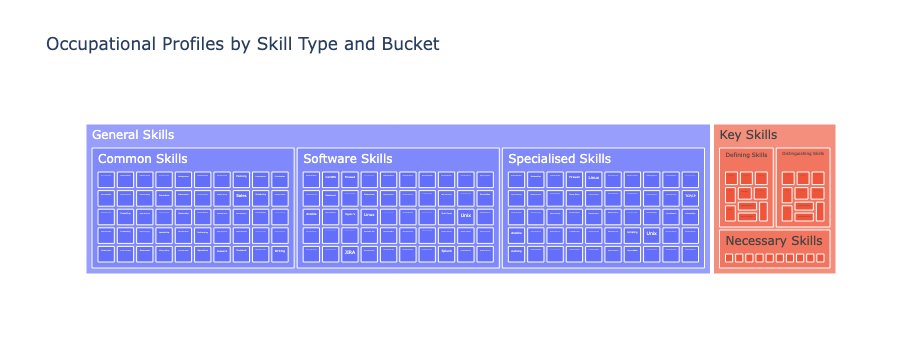

In [63]:
fig = px.treemap(
    occupationskills_ncsa, 
    path=['bucket', 'skilltype', 'skills'],  # Path to hierarchy
    title='Occupational Profiles by Skill Type and Bucket',
)
fig.update_traces(hovertemplate='%{label}')

# Show the figure
fig.show()

In [192]:
# Group by 'skilltype' and apply a function to select the top three rows for each group
top_three_unique_rows = occupationskills_ncsa.groupby('skilltype').apply(lambda x: x.head(3))

# Reset the index to avoid multi-level indexing
top_three_unique_rows.reset_index(drop=True, inplace=True)

In [197]:
# Calculate the proportion of each skill type
common_skill_type_counts = common_ncsa['type'].value_counts(normalize=True)
specialised_skill_type_counts = specialised_ncsa['type'].value_counts(normalize=True)

# Define the datasets for each chart
datasets = [common_ncsa, specialised_ncsa, software_ncsa]

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Common Skills', 'Specialized Skills', 'Software Skills'))

# Loop through the datasets and create a donut chart for each
for i, df in enumerate(datasets):
    # Calculate the proportion of each skill type
    skill_type_counts = df['type'].value_counts(normalize=True)
    
    # Create a donut chart
    pie_fig = px.pie(
        values=skill_type_counts.values,
        names=skill_type_counts.index,
        hole=0.4,
        title=f'Proportion of Skill Types for {df.name}'
    )
    
    # Add the donut chart to the subplot
    fig.add_trace(pie_fig['data'][0], row=1, col=i+1)

# Update layout
fig.update_layout(showlegend=False)

# Show figure
fig.show()

AttributeError: 'DataFrame' object has no attribute 'name'

## General Skills of Occupation

The main skills that represent an occupation's roles, from 

Includes **Common Skills**, **Specialized Skills**, **Software Skills**

### Specialized Skills

In [135]:
specialised_ncsa.head()

,skills,postings,postings_prop,profiles,profiles_prop,skillgrowth_proj,skillgrowth_market,skillgrowth_market_num,type
0,Operating Systems,34521,31.0,56592,8.0,22.6,Rapidly Growing,4,NaN
1,Linux,33693,31.0,66980,10.0,8.9,Growing,3,NaN
2,Computer Science,28033,25.0,6096,1.0,26.8,Rapidly Growing,4,NaN
3,System Administration,27769,25.0,66839,10.0,2.7,Lagging,1,NaN
4,Active Directory,25155,23.0,100091,15.0,-1.8,Lagging,1,NaN


#### General trends

In [87]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(labels=specialised_skill_type_counts.index, values=specialised_skill_type_counts, hole=0.3)])


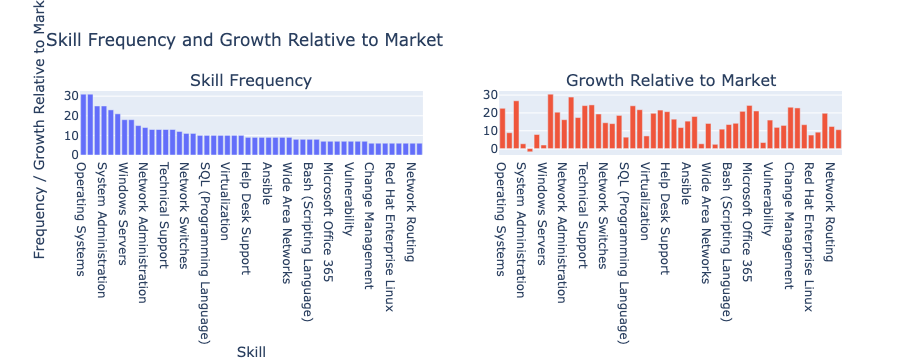

In [137]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Skill Frequency", "Growth Relative to Market"))

# Add trace for skill frequency
fig.add_trace(
    go.Bar(x=specialised_ncsa['skills'], y=specialised_ncsa['postings_prop'], name='Frequency'),
    row=1, col=1
)

# Add trace for growth relative to the market
fig.add_trace(
    go.Bar(x=specialised_ncsa['skills'], y=specialised_ncsa['skillgrowth_proj'], name='Growth Relative'),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='Skill Frequency and Growth Relative to Market',
    xaxis=dict(title='Skill'),
    yaxis=dict(title='Frequency / Growth Relative to Market'),
    showlegend=False  # Hide legend as it's not necessary in this case
)

# Show the figure
fig.show()

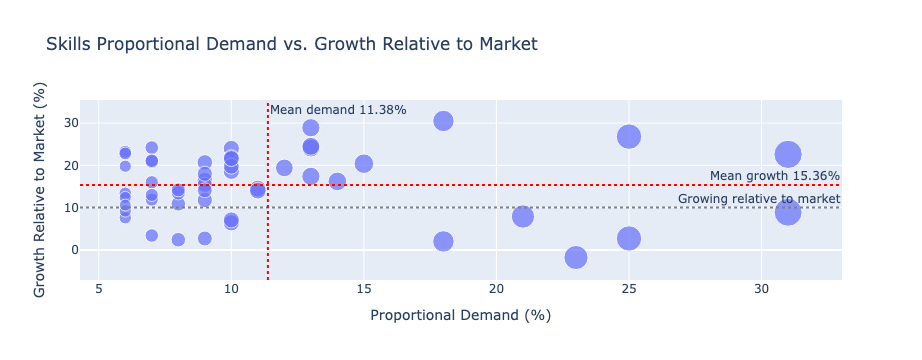

In [161]:
# Calculate mean values for proportional demand and growth relative to the market
mean_demand = specialised_ncsa['postings_prop'].mean()
mean_growth = specialised_ncsa['skillgrowth_proj'].mean()

# Define boundaries for each quadrant based on mean values
low_demand_threshold = mean_demand
high_demand_threshold = mean_demand
low_growth_threshold = mean_growth
high_growth_threshold = mean_growth

# Create scatter plot with proportional demand, growth relative to the market, and marker size representing importance
fig = px.scatter(
    specialised_ncsa, 
    x='postings_prop', 
    y='skillgrowth_proj', 
    size='postings', 
    hover_name='skills', 
    #color = 'type',
    title='Skills Proportional Demand vs. Growth Relative to Market',
    labels={'postings_prop': 'Proportional Demand (%)', 'skillgrowth_proj': 'Growth Relative to Market (%)'},
   # size_max=30,  # Adjust maximum marker size as needed
)

# Add lines to delineate quadrants
fig.add_hline(y=10.0, line_dash='dot', line_color='grey', annotation_text= 'Growing relative to market')
fig.add_hline(y=high_growth_threshold, line_dash='dot', line_color='red', annotation_text=f'Mean growth {mean_growth}%')
fig.add_vline(x=high_demand_threshold, line_dash='dot', line_color='red', annotation_text=f'Mean demand {mean_demand}%')

fig.show()

### Common Skills

In [121]:
common_ncsa.head()

,skills,postings,postings_prop,profiles,profiles_prop,skillgrowth_proj,skillgrowth_market,skillgrowth_market_num
0,Troubleshooting (Problem Solving),56938,52.0,161049,24.0,19.0,Growing,3
1,Management,41840,38.0,128575,19.0,5.3,Stable,2
2,Communication,41134,37.0,67650,10.0,3.6,Lagging,1
3,Operations,32576,30.0,105587,16.0,8.1,Stable,2
4,Problem Solving,27538,25.0,26240,4.0,11.3,Growing,3


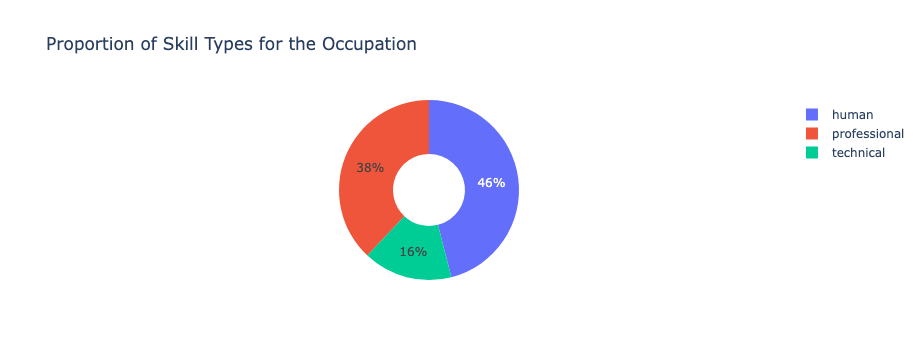

In [147]:
# Calculate the proportion of each skill type
common_skill_type_counts = common_ncsa['type'].value_counts(normalize=True)

# Create a donut chart
fig = px.pie(
    values=common_skill_type_counts.values,
    names=common_skill_type_counts.index,
    hole=0.4,
    title='Proportion of Skill Types for the Occupation'
)
fig.show()

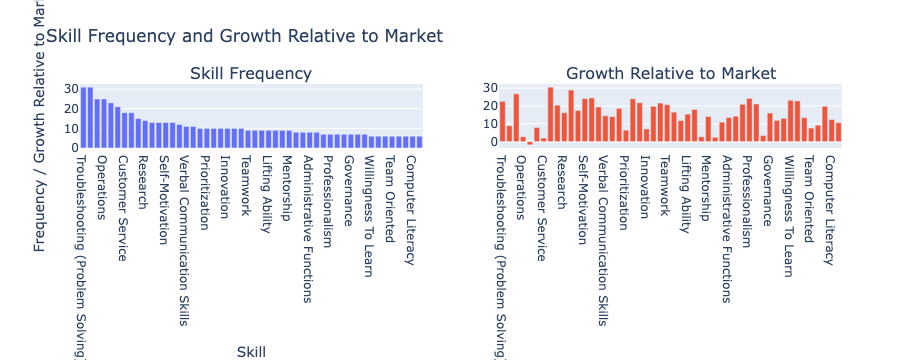

In [124]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Skill Frequency", "Growth Relative to Market"))

# Add trace for skill frequency
fig.add_trace(
    go.Bar(x=common_ncsa['skills'], y=specialised_ncsa['postings_prop'], name='Frequency'),
    row=1, col=1
)

# Add trace for growth relative to the market
fig.add_trace(
    go.Bar(x=common_ncsa['skills'], y=specialised_ncsa['skillgrowth_proj'], name='Growth Relative'),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='Skill Frequency and Growth Relative to Market',
    xaxis=dict(title='Skill'),
    yaxis=dict(title='Frequency / Growth Relative to Market'),
    showlegend=False  # Hide legend as it's not necessary in this case
)

# Show the figure
fig.show()

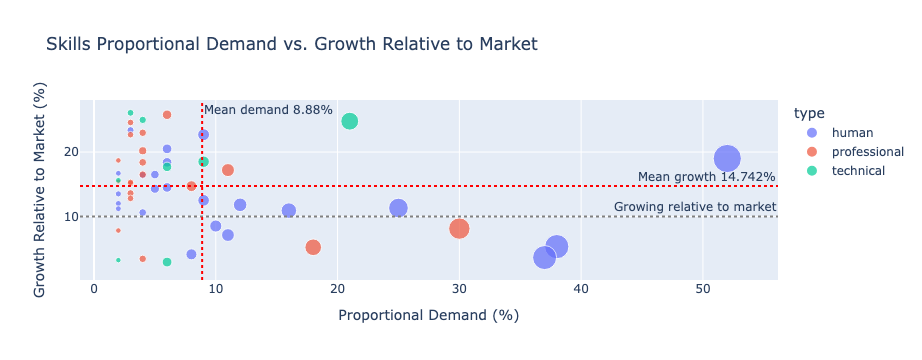

In [162]:
# Calculate mean values for proportional demand and growth relative to the market
mean_demand = common_ncsa['postings_prop'].mean()
mean_growth = common_ncsa['skillgrowth_proj'].mean()

# Define boundaries for each quadrant based on mean values
low_demand_threshold = mean_demand
high_demand_threshold = mean_demand
low_growth_threshold = mean_growth
high_growth_threshold = mean_growth

# Create scatter plot with proportional demand, growth relative to the market, and marker size representing importance
fig = px.scatter(
    common_ncsa, 
    x='postings_prop', 
    y='skillgrowth_proj', 
    size='postings', 
    hover_name='skills', 
    color = 'type', #the type 
    title='Skills Proportional Demand vs. Growth Relative to Market',
    labels={'postings_prop': 'Proportional Demand (%)', 'skillgrowth_proj': 'Growth Relative to Market (%)'},
#    text = 'skills'
)

# Add lines to delineate quadrants
fig.add_hline(y=10.0, line_dash='dot', line_color='grey', annotation_text= 'Growing relative to market')
fig.add_hline(y=high_growth_threshold, line_dash='dot', line_color='red', annotation_text=f'Mean growth {mean_growth}%')
fig.add_vline(x=high_demand_threshold, line_dash='dot', line_color='red', annotation_text=f'Mean demand {mean_demand}%')


# Show the figure
fig.show()

## Key Skills of Occupation
#### includes **Distinguishing Skills**, **Definig Skills**, and **Necessary Skills**

### Distinguishing Skills

# Forecasting:
The goal of this stage is to look at the growth over time of each skill in order to see how the occupaitonal profile changes in the next 2 years.

##### *HOW*:
**Projected Skill Growth forecasts**: Interpolate the next 2 year growth, look at how the occupational profile changes over time.

##### *QUESTIONS ANSWERED*:
* What is the % change of Human or Professional Skills?
* What are the relative sizes of skills now?
* Has the occupation's 'roles' balance changed, in terms of Key Skills? Does the job seem different?


##### Visualizations: 
- Line graphs mainly

In [180]:
# adding forecasted Number with projected growth
specialised_ncsa["postings_t1"] = (specialised_ncsa["postings"] + (specialised_ncsa["postings"]*specialised_ncsa["skillgrowth_proj"])/2).astype(int)
specialised_ncsa["postings_t2"] = (specialised_ncsa["postings"] + specialised_ncsa["postings"]*specialised_ncsa["skillgrowth_proj"]).astype(int)

specialised_ncsa.head()

,skills,postings,postings_prop,profiles,profiles_prop,skillgrowth_proj,skillgrowth_market,skillgrowth_market_num,type,postings_t1,postings_t2
0,Operating Systems,34521,31.0,56592,8.0,22.6,Rapidly Growing,4,NaN,424608,814695
1,Linux,33693,31.0,66980,10.0,8.9,Growing,3,NaN,183626,333560
2,Computer Science,28033,25.0,6096,1.0,26.8,Rapidly Growing,4,NaN,403675,779317
3,System Administration,27769,25.0,66839,10.0,2.7,Lagging,1,NaN,65257,102745
4,Active Directory,25155,23.0,100091,15.0,-1.8,Lagging,1,NaN,2515,-20123


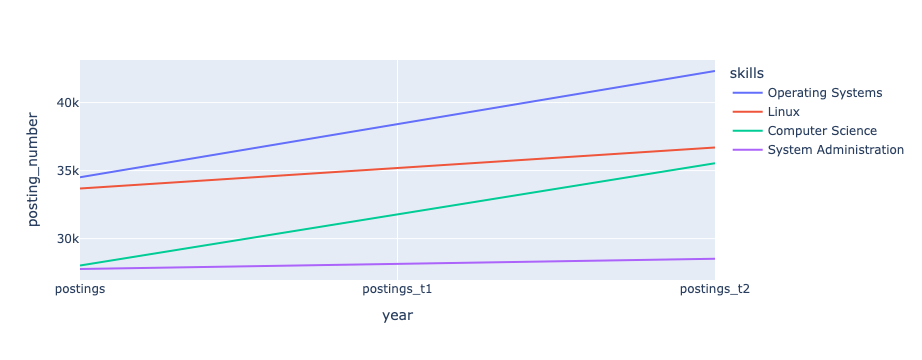

In [89]:
selected_data = specialised_ncsa[['skills', 'postings', 'postings_t1', 'postings_t2']].iloc[:4]
selected_data_long = pd.melt(selected_data, id_vars=['skills'], var_name='year', value_name='posting_number')

selected_data_long

fig = px.line(selected_data_long, x='year', y='posting_number', color='skills')
fig.show()

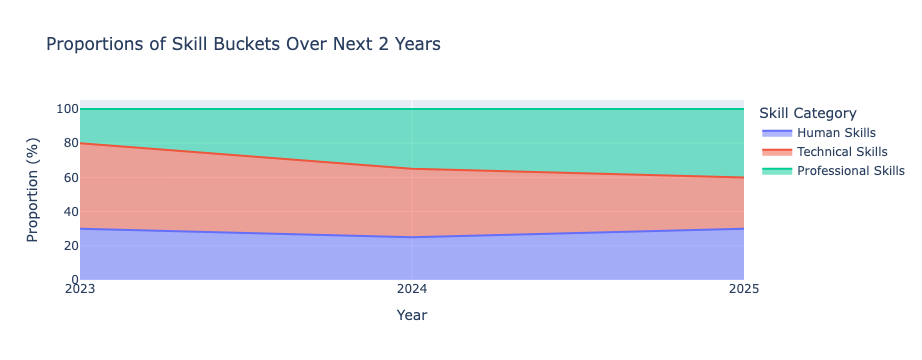

In [181]:
# Define years and proportions for each skill category
years = ['2023', '2024', '2025']
human_skills = [30, 25, 30]
technical_skills = [50, 40, 30]
professional_skills = [20, 35, 40]

# Create a DataFrame
data = {
    'Year': years * 3,
    'Skill Category': ['Human Skills'] * 3 + ['Technical Skills'] * 3 + ['Professional Skills'] * 3,
    'Proportion': human_skills + technical_skills + professional_skills
}

# Create stacked area plot
fig = px.area(data, x='Year', y='Proportion', color='Skill Category', 
              title='Proportions of Skill Buckets Over Next 2 Years',
              labels={'Year': 'Year', 'Proportion': 'Proportion (%)', 'Skill Category': 'Skill Category'},
              hover_data={'Year': False})  # Turn off hover for the "Year" value)
fig.update_layout(hovermode='x unified')

# Show figure
fig.show()

# Scenario Analysis
Make assumptions about AI-related skills to have different trends, and how this then affects the occupational profiles.

### First, isolate AI skills:

Ideas to get the skills that are related to or impacted by AI:
- Devise list of AI-related skills from keywords and lit review
- Devise list of AI-impacted skills from lit review
- Devise list of new AI-related skills from what has the highest %change since 2023, essentially what was inexistant until AI became mainstream (can look at the general job posting tab, skills, and then sort the table for the largest % increase projected growth. ALso there should be another way to get more data by selecting the hot/cold skills )

### Then, tag skills and perform impulse responses to see two-year occupational profile change

For example:
- AI only skills get a boost
- AI-leveraging skills get a parallel boost
- AI-impacted skills get a minus- what is the make-up now? More human skills?

From these changes in occupational make-up we can explore further the potential 'vulnerability' to AI.

### Scenario 1: Automation technology increases very rapidly in next two years (arbitrary speed of 100% for all AI-related skills)
##### Automation does not have relationship with other variables, I'm just injecting a large percentage growth and seeing how the rankings change in bubble graphs